<img src="http://escolar.itam.mx/centro_tesis/img/logo-ITAM.png" style="width:250px">
# Machine Learning

## Linear regression and error curve plot.
Tarea 3 : Gustavo Augusto Mondragón Sánchez : 136894

### Introducción:

En estadística, una regresión lineal es una aproximación para modelar de formaa lineal la relación entre una variable dependiente $Y$  y una o más variables exploratorias $X_i$.

En una regresión lineal, la relación se modela usando una función predictora lineal que estima los parámetros desconocidos del modelo desde los datos. Estos modelos son llamados "modelos lineales".

#### Instroducción matemática:

Dado un conjunto de datos ${y_i,x_i1,x_i2,...,x_in}$, una regresión lineal asume que la relación entre la variable dependiente $y_i$ y el n-vector de regresores $x_i$ es lineal. Esta relación es modelada mediante el error variable $ε_i$. Así pues, el modelo toma la forma: 

$$ y_i = β_01 + β_1 X_1 + β_2 X_2 + ... + β_n X_n + ε_i = X^T_i β + ε_i,     ~~~~~~~~~~     i=1,...,n$$


Y la regresión lineal simple (una variable dependiente y una dependiente) tiene la forma: 

$$ y = β_0 + β_1 X + ε$$


#### Hipótesis: 

* Esperanza matemática nula: $E(ε_i) = 0 $. Se asume que tomara valores positivos y negaticos que se cancelen para hacer el valor esperado cero.

* Homocedasticidad: $Var(ε_t) = E (ε_t−E ε_t )^2 = Eε^2_t = σ^2$ para todo t. Todos los términos de la perturbación tienen la misma varianza que es desconocida. La dispersión de cada ε_t en torno a su valor esperado es siempre la misma.

* Incorrelación o independencia: $Cov ( ε_t , ε_s ) = ( ε_t − E ε_t ) ( ε_s − E ε_s ) = E ε_t ε_s = 0 $ para todo t,s con t distinto de s. Las covarianzas entre las distintas pertubaciones son nulas, lo que quiere decir que no están correlacionadas. 

* Regresores estocásticos.

* Independencia lineal. No existen relaciones lineales exactas entre los regresores.

* Normalidad de las perturbaciones: $ε ∼ N ( 0 , σ^2 )$


#### Supuestos: 
* Que la relación entre las variables sea lineal.
* Que los errores en la medición de las variables explicativas sean independientes entre sí.
* Que los errores tengan varianza constante (Homocedasticidad).
* Que los errores tengan una esperanza matemática igual a cero (los errores de una misma magnitud y distinto signo son equiprobables).
* Que el error total sea la suma de todos los errores.


#### Relaciones no lineales:
La regresión lineal no es una herramienta mágica que predice cualquier conjunto de datos, una de las hipótesis más fuertes del modelo es que las variables independientes tienen una relación lineal con la variable dependiente. No siempre pasa esto, al graficar los datos antes de resolver la regresión lineal podemos apreciar el comportamiento (funcional) de los datos. Cuando la gráfica revela un comportamiento no linear, comunmente es posible hacer una "TRANSFORMACIÓN" a los datoss para hacerlos más lineales. Esta transformación nos permite usar una regresión lineal con mayor efectividad con datos no lineales.
Existen transformaciones lineales y no lineales. Las transformaciones se pueden aplicar a las variables dependientes y a las independientes.


#### Regresión múltiple:
Se usa una regresión lineal múltiple cuando se estudia la relación entre varias variables independientes y otra variable dependiente. 



[Wikipedia](https://en.wikipedia.org/wiki/Linear_regression)
[Transformaciones](stattrek.com/m/regression/linear-transformation.aspx?tutorial=ap)


### Objetivo:

* Crear una regresión lineal a partir de un conjunto de datos con una variable dependiente y una independiente. 

* Graficar la regressión y su ajuste a los datos.

* Graficar el error cuadrático medio al variar el coeficiente de regresión.

* En caso de que no haya una relación lineal hacer un ajuste con Transformación de linealidad.

* En caso de haber más de una variable independiente crear una regresión lineal múltiple.

In [284]:
#Librerías necesarias:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

### Estructura de los datos (1029 registros):
* Una variable dependiente continua Y
* Una variable independiente continua X


                 X            y
count  1029.000000  1029.000000
mean     50.008111    32.893917
std      29.055066    18.083566
min       0.030369    -4.586608
25%      25.201087    17.583093
50%      50.884987    33.564129
75%      75.636823    48.339811
max      99.959580    71.762748


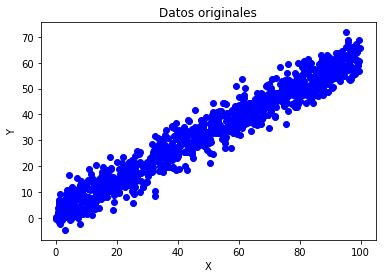

In [285]:
#Cargar los datos desde repositorio online:
data = pd.read_csv('https://raw.githubusercontent.com/ClaseML-2017/MaterialyTareas/master/datos/regLin.csv',delimiter=',') # Leer el archivo
#Descripción previa de los datos:
print data.describe()

data = np.array(data)

plt.scatter(data[:,0],data[:,1], color='blue')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Datos originales')
plt.show()

### División del conjunto de datos en entrenamiento y validación

In [286]:
np.random.seed(12345)     #Para revisiones de los resultados futuras

i = np.random.rand(len(data)) < 0.75

#División de los datos 
train = data[i]
test = data[~i]

trainx = train[:,0]
trainy = train[:,1]
testx = test[:,0]
testy = test[:,1]
#Validar tamaño correcto:
print "Tamaño entrenamiento %f: %f%%"%(len(train),(100*float(len(train))/len(sdata)))
print "Tamaño validación %f: %f%%"%(len(test),(100*float(len(test))/len(sdata)))

Tamaño entrenamiento 763.000000: 74.149660%
Tamaño validación 266.000000: 25.850340%


### Creación y entrenamiento del modelo:

In [293]:
# Crear objeto de regresión lineal de sklearn
regr = linear_model.LinearRegression()

# Entrenar el modelo.
regr.fit(trainx.reshape(-1, 1), trainy)

# Predicciones con el conjunto de validación
pred = regr.predict(testx.reshape(-1, 1))


print("Intersección: %.2f \nCoeficientes: %.2f" % (regr.intercept_,regr.coef_))
print("Error cuadrático medio: %.2f" % mean_squared_error(testy, pred))

#Score 1 es perfecto ajuste.
print('Score de la varianza: %.2f' % r2_score(testy, pred))


Intersección: 2.50 
Coeficientes: 0.61
Error cuadrático medio: 15.99
Score de la varianza: 0.95


### Gráfica de ajuste a los datos

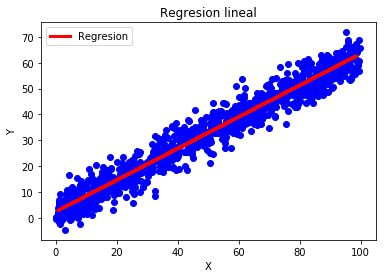

In [294]:
plt.scatter(data[:,0],data[:,1], color='blue')
plt.plot(testx, pred, color='red', linewidth=3)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regresion lineal')
plt.legend(['Regresion'])
plt.show()

### Gráfica de error cuadrático medio

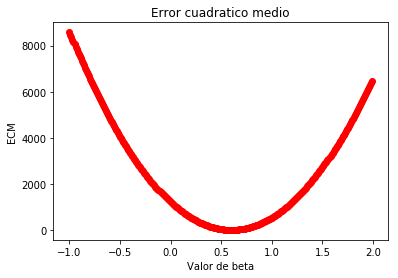

In [295]:
e = []
count = -1
while count < 2:
    epred = 2.64 + count*testx
    e.append(mean_squared_error(testy, epred))
    count = count + .01
plt.scatter(np.arange(-1.0, 2.0, 0.01), e,  color='red')
plt.title("Error cuadratico medio")
plt.xlabel('Valor de beta')
plt.ylabel('ECM')
plt.show()


## Conjunto 2 NO lineal (función cuadrática)

### Estructura de los datos: 

* Una variable dependiente continua Y
* Una variable independiente continua X


                 X            y
count  1029.000000  1029.000000
mean     50.757989  2137.739358
std      29.708336  1870.369352
min       0.230225     0.272241
25%      22.870956   342.135840
50%      53.951080  1774.199681
75%      76.256816  3658.103897
max      99.831593  7133.608688


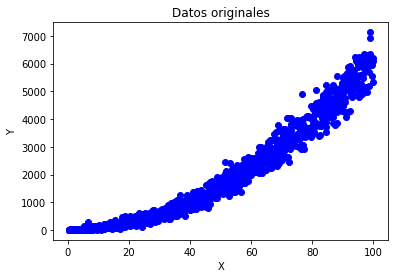

In [296]:
#Cargar los datos desde repositorio online:
dataNl = pd.read_csv('https://raw.githubusercontent.com/ClaseML-2017/MaterialyTareas/master/datos/regLin2.csv',delimiter=',') # Leer el archivo
#Descripción previa de los datos:
print dataNl.describe()

dataNl = np.array(dataNl)

plt.scatter(dataNl[:,0],dataNl[:,1], color='blue')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Datos originales')
plt.show()

### División del conjunto de datos en entrenamiento y validación:

In [297]:
np.random.seed(12345)     #Para revisiones de los resultados futuras

i = np.random.rand(len(dataNl)) < 0.75

#División de los datos 
train = dataNl[i]
test = dataNl[~i]

trainx = train[:,0]
trainy = train[:,1]
testx = test[:,0]
testy = test[:,1]
#Validar tamaño correcto:
n = len(dataNl) 

print "Tamaño entrenamiento %f: %f%%" % (len(train),(100*float(len(train))/n))
print "Tamaño validación %f: %f%%" % (len(test),(100*float(len(test))/n))

Tamaño entrenamiento 763.000000: 74.149660%
Tamaño validación 266.000000: 25.850340%


### Creación y entrenamiento del modelo con AJUSTE:

In [298]:
# Crear objeto de regresión lineal de sklearn
regr = linear_model.LinearRegression()

#Ajuste variable dependiente:
trainy = trainy**.5

# Entrenar el modelo.
regr.fit(trainx.reshape(-1, 1), trainy)

# Predicciones con el conjunto de validación
pred = regr.predict(testx.reshape(-1, 1))

#Ajustar la predicción:
pred = pred**2


print("Intersección: %.2f \nCoeficientes: %.2f" % (regr.intercept_,regr.coef_))
print("Error cuadrático medio: %.2f" % mean_squared_error(testy, pred))

#Score 1 es perfecto ajuste.
print('Score de la varianza: %.2f' % r2_score(testy, pred))

Intersección: 0.62 
Coeficientes: 0.77
Error cuadrático medio: 99783.28
Score de la varianza: 0.97


### Gráfica de ajuste a los datos:

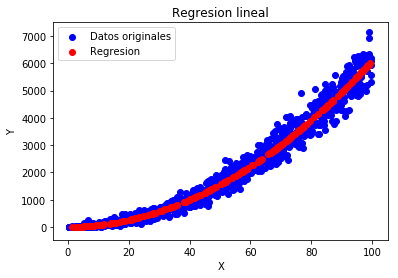

In [299]:
plt.scatter(dataNl[:,0],dataNl[:,1], color='blue')
plt.scatter(testx, pred, color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regresion lineal')
plt.legend(['Datos originales','Regresion'])
plt.show()

## Conjunto 3 NO lineal (senosoidal)

### Estructura de los datos: 

* Una variable dependiente continua Y
* Una variable independiente continua X


                 X            y
count  1029.000000  1029.000000
mean     50.163569    -0.024165
std      29.403168     0.701349
min       0.083795    -1.000000
25%      24.059073    -0.727235
50%      50.102445    -0.003449
75%      75.384381     0.665711
max      99.997174     0.999984


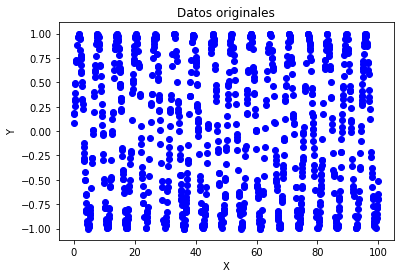

In [300]:
#Cargar los datos desde repositorio online:
dataNl = pd.read_csv('https://raw.githubusercontent.com/ClaseML-2017/MaterialyTareas/master/datos/regLin3.csv',delimiter=',') # Leer el archivo
#Descripción previa de los datos:
print dataNl.describe()

dataNl = np.array(dataNl)

plt.scatter(dataNl[:,0],dataNl[:,1], color='blue')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Datos originales')
plt.show()

### División del conjunto de datos en entrenamiento y validación:

In [301]:
np.random.seed(12345)     #Para revisiones de los resultados futuras

i = np.random.rand(len(dataNl)) < 0.75

#División de los datos 
train = dataNl[i]
test = dataNl[~i]

trainx = train[:,0]
trainy = train[:,1]
testx = test[:,0]
testy = test[:,1]
#Validar tamaño correcto:
n = len(dataNl) 

print "Tamaño entrenamiento %f: %f%%" % (len(train),(100*float(len(train))/n))
print "Tamaño validación %f: %f%%" % (len(test),(100*float(len(test))/n))

Tamaño entrenamiento 763.000000: 74.149660%
Tamaño validación 266.000000: 25.850340%


### Creación y entrenamiento del modelo con AJUSTE:

In [302]:
# Crear objeto de regresión lineal de sklearn
regr = linear_model.LinearRegression()

#Ajuste variable dependiente:
trainy = trainx

# Entrenar el modelo.
regr.fit(trainx.reshape(-1, 1), trainy)

# Predicciones con el conjunto de validación
pred = regr.predict(testx.reshape(-1, 1))

#Ajustar la predicción:
pred = np.sin(pred)


print("Intersección: %.2f \nCoeficientes: %.2f" % (regr.intercept_,regr.coef_))
print("Error cuadrático medio: %.2f" % mean_squared_error(testy, pred))

#Score 1 es perfecto ajuste.
print('Score de la varianza: %.2f' % r2_score(testy, pred))

Intersección: -0.00 
Coeficientes: 1.00
Error cuadrático medio: 0.00
Score de la varianza: 1.00


### Gráfica de ajuste a los datos

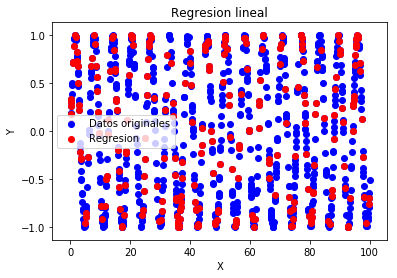

In [303]:
plt.scatter(dataNl[:,0],dataNl[:,1], color='blue')
plt.scatter(testx, pred, color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regresion lineal')
plt.legend(['Datos originales','Regresion'])
plt.show()

## Conjunto 4 NO lineales (función escalón)

### Estructura de los datos: 

* Una variable dependiente continua Y
* Una variable independiente continua X


                 X            y
count  1029.000000  1029.000000
mean     48.589544     0.325559
std      29.227099     0.468811
min       0.110611     0.000000
25%      22.625683     0.000000
50%      46.887538     0.000000
75%      74.247858     1.000000
max      99.983493     1.000000


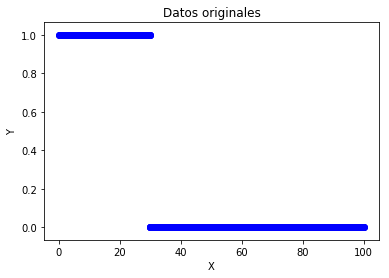

In [304]:
#Cargar los datos desde repositorio online:
dataNl = pd.read_csv('https://raw.githubusercontent.com/ClaseML-2017/MaterialyTareas/master/datos/regLin4.csv',delimiter=',') # Leer el archivo
#Descripción previa de los datos:
print dataNl.describe()

dataNl = np.array(dataNl)

plt.scatter(dataNl[:,0],dataNl[:,1], color='blue')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Datos originales')
plt.show()

### División del conjunto de datos en entrenamiento y validación:

In [306]:
np.random.seed(12345)     #Para revisiones de los resultados futuras

i = np.random.rand(len(dataNl)) < 0.75

#División de los datos 
train = dataNl[i]
test = dataNl[~i]

trainx = train[:,0]
trainy = train[:,1]
testx = test[:,0]
testy = test[:,1]
#Validar tamaño correcto:
n = len(dataNl) 

print "Tamaño entrenamiento %f: %f%%" % (len(train),(100*float(len(train))/n))
print "Tamaño validación %f: %f%%" % (len(test),(100*float(len(test))/n))

Tamaño entrenamiento 763.000000: 74.149660%
Tamaño validación 266.000000: 25.850340%


### Creación y entrenamiento del modelo con AJUSTE:

In [307]:
# Crear objeto de regresión lineal de sklearn
regr = linear_model.LinearRegression()

#Ajuste variable dependiente:
trainy = trainx

# Entrenar el modelo.
regr.fit(trainx.reshape(-1, 1), trainy)

# Predicciones con el conjunto de validación
pred = regr.predict(testx.reshape(-1, 1))

#Ajustar la predicción:
pred = x = pred<=30


print("Intersección: %.2f \nCoeficientes: %.2f" % (regr.intercept_,regr.coef_))
print("Error cuadrático medio: %.2f" % mean_squared_error(testy, pred))

#Score 1 es perfecto ajuste.
print('Score de la varianza: %.2f' % r2_score(testy, pred))

Intersección: 0.00 
Coeficientes: 1.00
Error cuadrático medio: 0.00
Score de la varianza: 1.00


### Gráfica de ajuste a los datos:

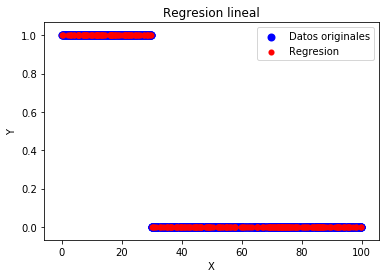

In [308]:
plt.scatter(dataNl[:,0],dataNl[:,1], color='blue',linewidths=2)
plt.scatter(testx, pred, color='red', linewidths=.1)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regresion lineal')
plt.legend(['Datos originales','Regresion'])
plt.show()

## Conjunto 5 Regresión múltiple

### Estructura de los datos: 

* Una variable dependiente continua Y
* Cinco variables independientes continuas $X_i, ~~~ i=1,2,3,4,5$


                 X           X2           X3           X4           X5  \
count  1029.000000  1029.000000  1029.000000  1029.000000  1029.000000   
mean     48.052380  3113.669342     1.542203    -0.011250   628.000000   
std      28.379936  2891.956247     0.452374     0.717016   297.191016   
min       0.006314     0.000040    -2.199666    -0.999993   114.000000   
25%      23.174764   537.069692     1.365015    -0.731530   371.000000   
50%      47.655827  2271.077831     1.678116    -0.046938   628.000000   
75%      71.372550  5094.040864     1.853531     0.732296   885.000000   
max      99.873062  9974.628611     1.999448     1.000000  1142.000000   

                  y  
count   1029.000000  
mean    3113.490528  
std     2892.963581  
min        0.000040  
25%      522.757565  
50%     2262.728789  
75%     5093.260718  
max    10028.067820  


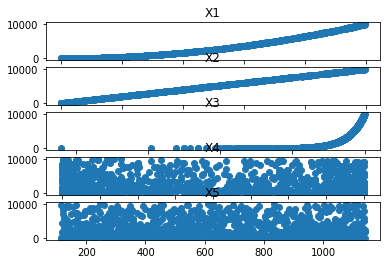

In [309]:
#Cargar los datos desde repositorio online:
dataNl = pd.read_csv('https://raw.githubusercontent.com/ClaseML-2017/MaterialyTareas/master/datos/regLinPoli.csv',delimiter=',') # Leer el archivo
#Descripción previa de los datos:
print dataNl.describe()

dataNl = np.array(dataNl)

#Gráficas para identificar el comportamiento que tiene con cada variable:
y = dataNl[:,-1]

plt.subplot(5, 1, 1)
plt.scatter(dataNl[:,0], y)
plt.title('X1')
plt.subplot(5, 1, 2)
plt.scatter(dataNl[:,1], y)
plt.title('X2')
plt.subplot(5, 1, 3)
plt.scatter(dataNl[:,2], y)
plt.title('X3')
plt.subplot(5, 1, 4)
plt.scatter(dataNl[:,3], y)
plt.title('X4')
plt.subplot(5, 1, 5)
plt.scatter(dataNl[:,4], y)
plt.title('X5')

plt.show()

### División del conjunto de datos en entrenamiento y validación:

In [310]:
np.random.seed(12345)     #Para revisiones de los resultados futuras

i = np.random.rand(len(dataNl)) < 0.75

#División de los datos 
train = dataNl[i]
test = dataNl[~i]

trainx = train[:,0:-1]
trainy = train[:,-1]
testx = test[:,0:-1]
testy = test[:,-1]
#Validar tamaño correcto:
n = len(dataNl) 

print "Tamaño entrenamiento %f: %f%%" % (len(train),(100*float(len(train))/n))
print "Tamaño validación %f: %f%%" % (len(test),(100*float(len(test))/n))

Tamaño entrenamiento 763.000000: 74.149660%
Tamaño validación 266.000000: 25.850340%


### Creación y entrenamiento del modelo con AJUSTE:

In [319]:
# Crear objeto de regresión lineal de sklearn
regr = linear_model.LinearRegression()

#Ajuste variable dependiente:
#trainy = trainx

# Entrenar el modelo.
regr.fit(trainx, trainy)

# Predicciones con el conjunto de validación
pred = regr.predict(testx)

#Ajustar la predicción:
#pred = x = pred<=30


print("Intersección: %.2f" % (regr.intercept_))
print("Coeficientes: ")
print regr.coef_.reshape(5,1)
print("Error cuadrático medio: %.2f" % mean_squared_error(testy, pred))

#Score 1 es perfecto ajuste.
print('Score de la varianza: %.2f' % r2_score(testy, pred))

Intersección: 0.93
Coeficientes: 
[[ -2.45490848e-01]
 [  1.00287887e+00]
 [  1.55750723e+00]
 [ -1.60787143e+00]
 [  1.13943749e-04]]
Error cuadrático medio: 972.52
Score de la varianza: 1.00


### Gráfica de ajuste a los datos:

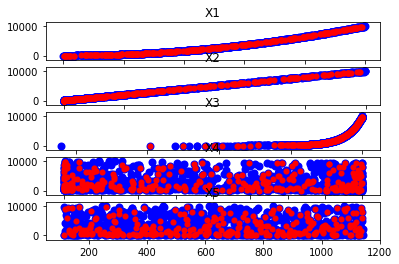

In [320]:
#Gráficas para identificar el comportamiento que tiene con cada variable:
y = dataNl[:,-1]
plt.title('Variables independientes comparadas')
plt.legend(['Datos originales','Regresion'])

plt.subplot(5, 1, 1)
plt.scatter(dataNl[:,0], y, color='blue',linewidths=2)
plt.scatter(testx[:,0], pred, color='red', linewidths=.1)
plt.title('X1')
plt.subplot(5, 1, 2)
plt.scatter(dataNl[:,1], y, color='blue',linewidths=2)
plt.scatter(testx[:,1], pred, color='red', linewidths=.1)
plt.title('X2')
plt.subplot(5, 1, 3)
plt.scatter(dataNl[:,2], y, color='blue',linewidths=2)
plt.scatter(testx[:,2], pred, color='red', linewidths=.1)
plt.title('X3')
plt.subplot(5, 1, 4)
plt.scatter(dataNl[:,3], y, color='blue',linewidths=2)
plt.scatter(testx[:,3], pred, color='red', linewidths=.1)
plt.title('X4')
plt.subplot(5, 1, 5)
plt.scatter(dataNl[:,4], y, color='blue',linewidths=2)
plt.scatter(testx[:,4], pred, color='red', linewidths=.1)
plt.title('X5')

plt.show()

## Conjunto 6 Regresión múltiple 2:

### Estructura de los datos: 

* Una variable dependiente continua Y
* 36 variables independientes continuas $X_i, ~~~ i=1,...,36$

In [321]:
#Cargar los datos desde repositorio online:
dataNl = pd.read_csv('https://raw.githubusercontent.com/ClaseML-2017/MaterialyTareas/master/datos/regLinPoli2.csv',delimiter=',') # Leer el archivo
#Descripción previa de los datos:
print dataNl.describe()

dataNl = np.array(dataNl)

                X1             X2           X3           X4           X5  \
count  1029.000000    1029.000000  1029.000000  1029.000000  1029.000000   
mean    -12.492680  327718.372035     2.565422    -0.018122     1.235180   
std     572.608894  298395.344783     0.424105     0.715733    58.709228   
min    -992.795572       1.098476     0.020395    -0.999991  -100.000000   
25%    -499.000060   59791.243170     2.388319    -0.760277   -51.000000   
50%     -27.174576  241226.533900     2.691213    -0.029038     3.000000   
75%     477.216100  547320.664300     2.869121     0.714801    52.000000   
max     998.297367  996597.632200     2.999260     0.999992   100.000000   

                X6           X7           X8           X9          X10  \
count  1029.000000   1029.00000  1029.000000  1029.000000  1029.000000   
mean   -153.782162 -23648.95337    -2.565422     0.018122    -4.108330   
std       0.000000      0.00000     0.424105     0.715733   584.648570   
min    -153.782162 

### División del conjunto de datos en entrenamiento y validación:

In [322]:
np.random.seed(12345)     #Para revisiones de los resultados futuras

i = np.random.rand(len(dataNl)) < 0.75

#División de los datos 
train = dataNl[i]
test = dataNl[~i]

trainx = train[:,0:-1]
trainy = train[:,-1]
testx = test[:,0:-1]
testy = test[:,-1]
#Validar tamaño correcto:
n = len(dataNl) 

print "Tamaño entrenamiento %f: %f%%" % (len(train),(100*float(len(train))/n))
print "Tamaño validación %f: %f%%" % (len(test),(100*float(len(test))/n))

Tamaño entrenamiento 763.000000: 74.149660%
Tamaño validación 266.000000: 25.850340%


### Creación y entrenamiento del modelo con AJUSTE:

In [324]:
# Crear objeto de regresión lineal de sklearn
regr = linear_model.LinearRegression()

#Ajuste variable dependiente:
#trainy = trainx

# Entrenar el modelo.
regr.fit(trainx, trainy)

# Predicciones con el conjunto de validación
pred = regr.predict(testx)

#Ajustar la predicción:
#pred = x = pred<=30


print("Intersección: %.2f" % (regr.intercept_))
print("Coeficientes: ")
print regr.coef_.reshape(len(regr.coef_),1)

print("Error cuadrático medio: %.2f" % mean_squared_error(testy, pred))

#Score 1 es perfecto ajuste.
print('Score de la varianza: %.2f' % r2_score(testy, pred))

Intersección: -14991737251856528697507258040320.00
Coeficientes: 
[[  3.39451066e+17]
 [ -9.28151117e+13]
 [  5.65533793e+25]
 [  5.46689936e+24]
 [ -6.14540979e+16]
 [  1.14350480e+25]
 [ -6.34002508e+26]
 [  5.65533499e+25]
 [  5.46689325e+24]
 [ -1.10278800e+15]
 [  8.74412770e+15]
 [  1.98168205e+15]
 [  6.82442063e+14]
 [ -6.33294662e+13]
 [ -2.63814508e+15]
 [ -2.32329745e+15]
 [ -1.27989242e+15]
 [ -2.97655056e+15]
 [ -6.96088464e+14]
 [  9.33242234e+14]
 [  9.68292190e+15]
 [ -7.19516577e+15]
 [ -1.31279705e+14]
 [ -2.73774231e+14]
 [  1.17673406e+15]
 [ -9.84409673e+14]
 [ -1.22610143e+15]
 [ -1.74290591e+15]
 [  2.89067734e+15]
 [ -3.35853445e+16]
 [  1.42157392e+15]
 [ -1.21181413e+13]
 [ -8.16349033e+14]
 [ -1.64524464e+15]
 [  2.10348287e+15]
 [ -3.65975400e+15]
 [ -4.40831862e+15]
 [ -6.87174533e+16]]
Error cuadrático medio: 30905234006930740654001575018690858975232.00
Score de la varianza: 0.51


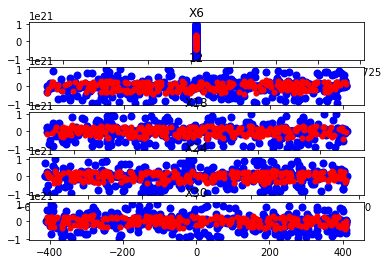

In [325]:
#Gráficas para identificar el comportamiento que tiene con cada variable:
y = dataNl[:,-1]
plt.title('Variables independientes comparadas')
plt.legend(['Datos originales','Regresion'])

plt.subplot(5, 1, 1)
plt.scatter(dataNl[:,5], y, color='blue',linewidths=2)
plt.scatter(testx[:,5], pred, color='red', linewidths=.1)
plt.title('X6')
plt.subplot(5, 1, 2)
plt.scatter(dataNl[:,11], y, color='blue',linewidths=2)
plt.scatter(testx[:,11], pred, color='red', linewidths=.1)
plt.title('12')
plt.subplot(5, 1, 3)
plt.scatter(dataNl[:,17], y, color='blue',linewidths=2)
plt.scatter(testx[:,17], pred, color='red', linewidths=.1)
plt.title('X18')
plt.subplot(5, 1, 4)
plt.scatter(dataNl[:,23], y, color='blue',linewidths=2)
plt.scatter(testx[:,23], pred, color='red', linewidths=.1)
plt.title('X24')
plt.subplot(5, 1, 5)
plt.scatter(dataNl[:,29], y, color='blue',linewidths=2)
plt.scatter(testx[:,29], pred, color='red', linewidths=.1)
plt.title('X30')

plt.show()